Aviation Data

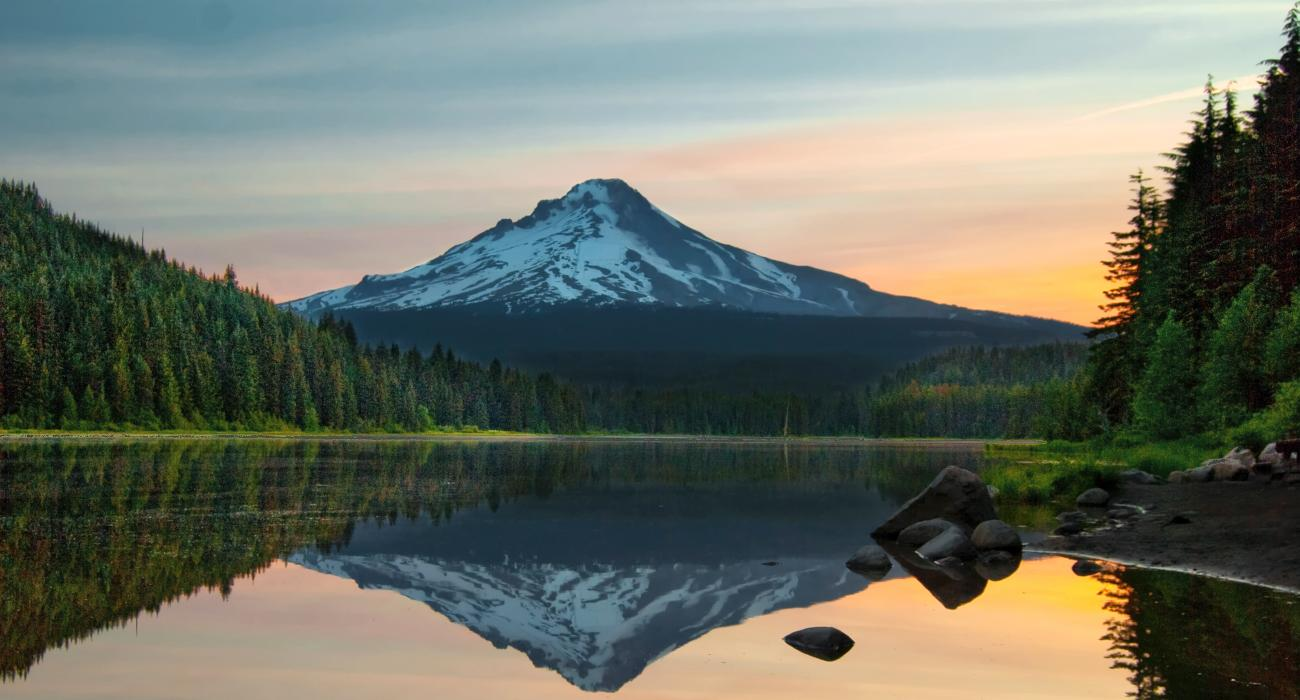

In [1]:
# Objective 1: Look for aircraft that is lowest risk in terms of investment
# Objective 2: Give 3 business recommendations
# Objective 3: Visualizations

In [2]:
# Import libraries
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('data/Aviation_Data.csv')

/var/folders/1f/98thg_p17ml4vwvv3m9xpp380000gn/T/ipykernel_42778/3151680963.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Aviation_Data.csv')


GOT RID OF IRRELEVANT COLUMNS

In [4]:
df.shape

(90348, 31)

In [5]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [6]:
new_cols = ['Country', 'Injury.Severity', 'Aircraft.damage', 
            'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines',
            'Engine.Type', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 
            'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 
            'Report.Status']

In [7]:
df = df[new_cols]

In [8]:
df.columns

Index(['Country', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category',
       'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

CLEANING EACH INDIVIDUAL COLUMN

In [9]:
df['Country'] = df['Country'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)
df['Country'] = df['Country'].str.replace("United states", "United States")
df['Country'] = df['Country'].str.replace("United kingdom", "United Kingdom")
df['Country'] = df['Country'].str.replace("South africa", "South Africa")

In [10]:
df.loc[~df['Country'].isin(['United States', 'Canada', 'Mexico', 'Brazil', 
'United Kingdom', 'Australia', 'France', 'Spain', 'Bahamas', 'Germany', 'Columbia', 
'South Africa', 'Japan', 'Venezuela', 'Italy', 'Argentina', 'Indonesia', 'India', 'Peru', 'Russia']), 
'Country'] = 'Other'

In [11]:
df['Country'].unique()

array(['United States', 'Other', 'Bahamas', 'Germany', 'Canada', 'Mexico',
       'Australia', 'Japan', 'Venezuela', 'United Kingdom', 'France',
       'Brazil', 'Argentina', 'Italy', 'Spain', 'Peru', 'South Africa',
       'India', 'Indonesia', 'Russia'], dtype=object)

In [12]:
df['Make'] = df['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [13]:
df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse ralph l        1
Name: count, Length: 7587, dtype: int64

In [14]:
df.loc[~df['Injury.Severity'].isin(['Non-Fatal', 'nan', 'Minor', 'Serious', 'Incident', 'Unavailable']), 
'Injury.Severity'] = 'Fatal'

In [15]:
df['Injury.Severity'].unique()

array(['Fatal', 'Non-Fatal', 'Incident', 'Unavailable', 'Minor',
       'Serious'], dtype=object)

In [16]:
df['Number.of.Engines'] = df['Number.of.Engines'].apply(lambda x: float(x))

In [17]:
df['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

In [18]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [19]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Executive/corporate", "Business")
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - State", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - Federal", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Public Aircraft - Local", "Public Aircraft" )
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Air Race/show", "Air Race show" )

In [20]:
df['Purpose.of.flight'] = df['Purpose.of.flight'].str.replace("Air Race show", "Air Race Show" )

In [21]:
df['Purpose.of.flight'].unique()

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Aerial Observation', 'Aerial Application', 'Public Aircraft',
       'Skydiving', 'Other Work Use', 'Positioning', 'Flight Test',
       'Air Race Show', 'Air Drop', 'Glider Tow', 'External Load',
       'Banner Tow', 'Firefighting', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [22]:
df['Weather.Condition'] = df['Weather.Condition'].str.replace("Unk", "UNK")

In [23]:
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC', nan], dtype=object)

In [24]:
df.loc[~df['Report.Status'].isin(['Probable Cause', 'Foreign']), 
'Report.Status'] = 'Other'

In [25]:
df['Report.Status'].unique()

array(['Probable Cause', 'Other', 'Foreign'], dtype=object)

In [26]:
df.isna().sum()

Country                       0
Injury.Severity               0
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status                 0
dtype: int64

CLEANING THE COLUMN NAMES

In [27]:
new_column_names = {
    'Injury.Severity': 'Injury Severity',
    'Aircraft.damage': 'Aircraft Damage',
    'Aircraft.Category': 'Aircraft Category',
    'Amateur.Built': 'Amateur Built',
    'Number.of.Engines': 'Engines Count',
    'Purpose.of.flight': 'Purpose of Flight',
    'Total.Fatal.Injuries': 'Total Fatal Injuries',
    'Total.Serious.Injuries': 'Total Serious Injuries',
    'Total.Minor.Injuries': 'Total Minor Injuries',
    'Total.Uninjured': 'Total Uninjured',
    'Weather.Condition': 'Weather Condition',
    'Broad.phase.of.flight': 'Broad Flight Phase',
    'Report.Status': 'Report Status',
    'Engine.Type': 'Engine Type'
}

In [28]:
df.rename(columns=new_column_names, inplace=True)

In [29]:
df.head(60)

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
0,United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,United States,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
5,United States,Non-Fatal,Substantial,Airplane,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause
6,United States,Fatal,Destroyed,NaN,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause
7,United States,Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause
8,United States,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause
9,United States,Non-Fatal,Substantial,NaN,North american,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause


GETTING RID OF NANS

In [30]:
df[df['Engines Count'].isna()]

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
4,United States,Fatal,Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
3600,United States,Non-Fatal,NaN,NaN,Piccard,AX-6,No,NaN,Unknown,Personal,0.0,1.0,0.0,1.0,VMC,Landing,Probable Cause
3741,United States,Non-Fatal,Substantial,NaN,Schweizer,2-33A,No,NaN,Unknown,Instructional,0.0,1.0,0.0,0.0,VMC,Takeoff,Probable Cause
3772,United States,Fatal,Destroyed,NaN,Schweizer,SGS 1-26B,No,NaN,Unknown,Instructional,1.0,0.0,0.0,0.0,VMC,Approach,Probable Cause
3870,United States,Non-Fatal,Substantial,NaN,Pratt-read,PRG-1,No,NaN,Unknown,Instructional,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90342,Brazil,Fatal,NaN,NaN,Air tractor,AT502,No,NaN,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,Other
90343,United States,Minor,NaN,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,Other
90344,United States,Fatal,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,Other
90346,United States,Fatal,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,Other


In [31]:
df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse ralph l        1
Name: count, Length: 7587, dtype: int64

In [32]:
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501')]['Engines Count'].isna().sum()
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501'), ['Engines Count']] = float(2)
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501'), ['Aircraft Category']] = str('Airplane')

In [33]:
df.loc[(df['Make'] == 'Cessna') & (df['Model'] == '501')]

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
4,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
547,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Business,0.0,0.0,0.0,2.0,VMC,Landing,Probable Cause
3256,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Unknown,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause
11713,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Jet,Positioning,2.0,0.0,0.0,0.0,IMC,Approach,Probable Cause
13788,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,3.0,VMC,Landing,Probable Cause
14492,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,6.0,VMC,Approach,Probable Cause
16140,United States,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Jet,Business,0.0,0.0,0.0,4.0,VMC,Landing,Probable Cause
24193,United States,Non-Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Fan,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause
36623,Germany,Non-Fatal,Substantial,Airplane,Cessna,501,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,1.0,UNK,NaN,Foreign
37148,Other,Non-Fatal,Destroyed,Airplane,Cessna,501,No,2.0,Turbo Fan,Unknown,0.0,0.0,0.0,2.0,VMC,NaN,Foreign


In [34]:
dict(df['Injury Severity'].value_counts())

{'Non-Fatal': 67357,
 'Fatal': 20285,
 'Incident': 2219,
 'Minor': 218,
 'Serious': 173,
 'Unavailable': 96}

In [35]:
df

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status
0,United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,United States,Minor,NaN,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,Other
90344,United States,Fatal,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,Other
90345,United States,Non-Fatal,Substantial,Airplane,American champion aircraft,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,Other
90346,United States,Fatal,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,Other


In [36]:
len(df['Model'].unique())

12319

In [37]:
len(df['Make'].unique())

7588

In [38]:
df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse ralph l        1
Name: count, Length: 7587, dtype: int64

In [39]:
df['Make'].value_counts()[:20]

Make
Cessna               27149
Piper                14870
Beech                 5372
Boeing                2745
Bell                  2722
Mooney                1334
Robinson              1230
Grumman               1172
Bellanca              1045
Hughes                 932
Schweizer              773
Air tractor            691
Aeronca                636
Mcdonnell douglas      608
Maule                  589
Champion               519
Stinson                439
Aero commander         429
De havilland           422
Luscombe               414
Name: count, dtype: int64

In [40]:
# Sample dataframe
# df = pd.DataFrame(...)

# Step 1: Filter out the required columns
df_filtered = df[['Make', 'Engines Count', 'Injury Severity']]

# Drop rows with missing 'Engines Count' values
df_filtered = df_filtered.dropna(subset=['Engines Count'])

# Step 2: Keep rows that have a 'Make' value in the top 20 most common 'Make' values
top_20_makes = df_filtered['Make'].value_counts().head(40).index
df_filtered = df_filtered[df_filtered['Make'].isin(top_20_makes)]

# Step 3: One-hot encode the 'Make' column
df_encoded = pd.get_dummies(df_filtered, columns=['Make'])

# Step 4: Convert the 'Injury Severity' column to binary
df_encoded['Injury Severity'] = df_encoded['Injury Severity'].apply(lambda x: 1 if x == 'Fatal' else 0)

# Ensure the DataFrame has integer type columns
df_encoded = df_encoded.astype(int)

# The final dataframe is df_encoded
df_encoded



,Engines Count,Injury Severity,Make_Aero commander,Make_Aeronca,Make_Aerospatiale,Make_Air tractor,Make_Air tractor inc,Make_Airbus,Make_Ayres,Make_Beech,...,Make_Pitts,Make_Robinson,Make_Robinson helicopter,Make_Robinson helicopter company,Make_Rockwell,Make_Schweizer,Make_Sikorsky,Make_Stinson,Make_Swearingen,Make_Taylorcraft
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90324,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90328,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90332,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90335,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
# Assuming df_encoded is already created as per our previous discussions

# Sum the injury severity for each make based on one-hot encoded columns
make_columns = [col for col in df_encoded.columns if 'Make_' in col]

# Proportion calculation for each 'Make'
proportions = {}
for make_col in make_columns:
    total_for_make = df_encoded[make_col].sum()
    fatal_for_make = (df_encoded[df_encoded['Injury Severity'] == 1][make_col]).sum()
    proportions[make_col] = fatal_for_make / total_for_make if total_for_make != 0 else 0

# Sorting makes by proportions
sorted_proportions = dict(sorted(proportions.items(), key=lambda item: item[1], reverse=True))

print(sorted_proportions)


{'Make_Airbus': 0.3387096774193548, 'Make_Cirrus design corp': 0.3212669683257919, 'Make_North american': 0.3170731707317073, 'Make_Beech': 0.2817398119122257, 'Make_Mooney': 0.27935533384497313, 'Make_Grumman american': 0.2577777777777778, 'Make_Aero commander': 0.25495049504950495, 'Make_Eurocopter': 0.25252525252525254, 'Make_Aerospatiale': 0.2328767123287671, 'Make_Rockwell': 0.22418879056047197, 'Make_Robinson': 0.21456692913385828, 'Make_Sikorsky': 0.21176470588235294, 'Make_De havilland': 0.20930232558139536, 'Make_Piper': 0.2048611111111111, 'Make_Bellanca': 0.20330739299610895, 'Make_Ercoupe (eng & research corp.)': 0.19375, 'Make_Embraer': 0.19101123595505617, 'Make_Pitts': 0.1891891891891892, 'Make_Bell': 0.18271604938271604, 'Make_Ayres': 0.17410714285714285, 'Make_Air tractor inc': 0.17073170731707318, 'Make_Douglas': 0.17012448132780084, 'Make_Champion': 0.16831683168316833, 'Make_Cessna': 0.15891132572431957, 'Make_Robinson helicopter company': 0.15706806282722513, 'Make

In [42]:
#for each make in the top 20 makes, we want the average number of the sum of the four columns that give us the total number of passengers

In [43]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']

# Find the top 20 makes
top_20_makes = df['Make'].value_counts().nlargest(20).index

# Filter the dataframe to only have the top 20 makes
df_top_20 = df[df['Make'].isin(top_20_makes)]

# Group by 'Make' and get the mean of the 'Total.Passengers'
avg_passengers_per_make = df_top_20.groupby('Make')['Total Passengers'].mean().reset_index()

print(avg_passengers_per_make)

                 Make  Total Passengers
0      Aero commander          2.107438
1             Aeronca          1.605072
2         Air tractor          1.017208
3               Beech          2.620352
4                Bell          2.318931
5            Bellanca          1.654485
6              Boeing         79.758326
7              Cessna          2.045707
8            Champion          1.559913
9        De havilland          6.843844
10            Grumman          1.528302
11             Hughes          2.039062
12           Luscombe          1.485549
13              Maule          1.838574
14  Mcdonnell douglas         83.310421
15             Mooney          1.983651
16              Piper          2.120388
17           Robinson          1.821429
18          Schweizer          1.381329
19            Stinson          1.840849


In [44]:
df

,Country,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Amateur Built,Engines Count,Engine Type,Purpose of Flight,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Flight Phase,Report Status,Total Passengers
0,United States,Fatal,Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,2.0
1,United States,Fatal,Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,4.0
2,United States,Fatal,Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,NaN
3,United States,Fatal,Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2.0
4,United States,Fatal,Destroyed,Airplane,Cessna,501,No,2.0,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,United States,Minor,NaN,NaN,Piper,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,Other,1.0
90344,United States,Fatal,NaN,NaN,Bellanca,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,Other,0.0
90345,United States,Non-Fatal,Substantial,Airplane,American champion aircraft,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,Other,1.0
90346,United States,Fatal,NaN,NaN,Cessna,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,Other,0.0


In [45]:
# Assuming you already have df and df_encoded loaded

# 1. Extract top 20 'Makes'
top_40_makes = df['Make'].value_counts().head(40).index

# Filter the df to keep only these top 20 makes
df_top_makes = df[df['Make'].isin(top_40_makes)]

# Compute the average sum across the specified columns for each 'Make'
columns_to_sum = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured']
df_top_makes['Total Passengers'] = df_top_makes[columns_to_sum].sum(axis=1)
average_passengers = df_top_makes.groupby('Make')['Total Passengers'].mean()

# Fatality rates from df_encoded
make_columns = [col for col in df_encoded.columns if 'Make_' in col]

proportions = {}
for make_col in make_columns:
    total_for_make = df_encoded[make_col].sum()
    fatal_for_make = (df_encoded[df_encoded['Injury Severity'] == 1][make_col]).sum()
    proportions[make_col.replace('Make_', '')] = fatal_for_make / total_for_make if total_for_make != 0 else 0

# Convert the proportions dictionary to a DataFrame
df_proportions = pd.DataFrame(list(proportions.items()), columns=['Make', 'Average Fatality Rate']).set_index('Make')

# Merge both data
result = pd.merge(average_passengers, df_proportions, left_index=True, right_index=True)

print(result)



                             Total Passengers  Average Fatality Rate
Make                                                                
Aero commander                       2.128205               0.254950
Aeronca                              1.591195               0.125000
Aerospatiale                         8.507732               0.232877
Air tractor                          1.033285               0.143297
Air tractor inc                      1.027397               0.170732
Airbus                              78.639175               0.338710
Ayres                                1.079832               0.174107
Beech                                2.626768               0.281740
Bell                                 2.352682               0.182716
Bellanca                             1.636364               0.203307
Boeing                              80.889253               0.113326
Cessna                               2.056577               0.158911
Champion                          

/var/folders/1f/98thg_p17ml4vwvv3m9xpp380000gn/T/ipykernel_42778/3482550901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_makes['Total Passengers'] = df_top_makes[columns_to_sum].sum(axis=1)


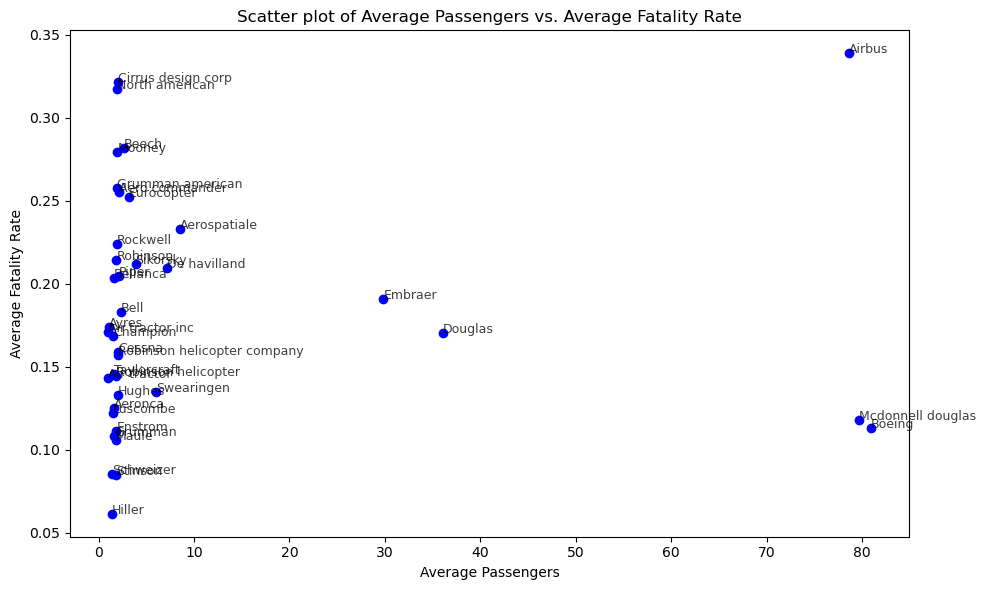

In [46]:
import matplotlib.pyplot as plt

# Assuming you have already created the 'result' DataFrame from the previous steps

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(result['Total Passengers'], result['Average Fatality Rate'], color='blue')
plt.title('Scatter plot of Average Passengers vs. Average Fatality Rate')
plt.xlabel('Average Passengers')
plt.ylabel('Average Fatality Rate')

# Label each point with the 'Make' for clarity
for make, row in result.iterrows():
    plt.annotate(make, (row['Total Passengers'], row['Average Fatality Rate']), fontsize=9, alpha=0.75)

plt.tight_layout()
plt.show()
